In [1]:
# Lab 9 XOR
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.

In [2]:
xy1=pd.read_csv('datasets_Wine.csv')
xy=xy1.values
for i in range(0,xy.shape[0]):
    if(xy[i][-1]=='good'):
        xy[i][-1]=1
    elif(xy[i][-1]=='bad'):
        xy[i][-1]=0

xy[:,:-1]=min_max_scaler(xy[:,:-1])
test_line=int(xy.shape[0]*0.7)
x_data1=xy[:,:-1]
x_data=x_data1[:test_line,:]

y_data=xy[:test_line,[-1]] 
x_test=x_data1[test_line:,:]
y_test=xy[test_line:,[-1]] 
x_data = np.array(x_data, dtype=np.float32) 
y_data = np.array(y_data, dtype=np.float32) 
x_test = np.array(x_test, dtype=np.float32) 
y_test = np.array(y_test, dtype=np.float32)


In [3]:


X = tf.placeholder(tf.float32, [None,x_data.shape[1]])
X_img= tf.reshape(X,[-1,x_data1.shape[1],1,1])
Y = tf.placeholder(tf.float32, [None, 1])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([6,1,1,40],stddev=0.01))
L1 = tf.nn.conv2d(X_img,W1,strides=[1,2,1,1],padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 1, 1, 1], strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
L1_flat = tf.reshape(L1, [-1,6*1*40])


W2 = tf.get_variable("W3", shape=[6*1*40, 40],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([40]))
L2 = tf.nn.relu(tf.matmul(L1_flat, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# W3 = tf.get_variable("W5", shape=[40, 1],initializer=tf.contrib.layers.xavier_initializer())
W3 = tf.get_variable("W4", shape=[40, 1],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]))
logits = tf.matmul(L2, W3) + b3
hypothesis = tf.matmul(L2, W3) + b3
save_file = './train_model_Wine_CNN.ckpt'
saver = tf.train.Saver()

# cost/loss function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [4]:
a=np.zeros((4001))
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(4001):
        _, a[step],accura = sess.run([train, cost,accuracy], feed_dict={X: x_data, Y: y_data, keep_prob:0.7})
        # Accuracy report
        h, p, acc = sess.run(
            [hypothesis, predicted, accuracy], feed_dict={X: x_test, Y: y_test, keep_prob:1})
        if step % 100 == 0:
            print(step, f"\ncost: \n{a[step]} \ntest accuracy: \n{acc}")
    
    
    saver.save(sess, save_file)

0 
cost: 
1.3793506622314453 
test accuracy: 
0.5541666746139526
100 
cost: 
0.7318843603134155 
test accuracy: 
0.49166667461395264
200 
cost: 
0.6127403974533081 
test accuracy: 
0.6625000238418579
300 
cost: 
0.5560793280601501 
test accuracy: 
0.706250011920929
400 
cost: 
0.543881893157959 
test accuracy: 
0.7354166507720947
500 
cost: 
0.5322852730751038 
test accuracy: 
0.7416666746139526
600 
cost: 
0.529896080493927 
test accuracy: 
0.7416666746139526
700 
cost: 
0.5264780521392822 
test accuracy: 
0.7270833253860474
800 
cost: 
0.5119611620903015 
test accuracy: 
0.7270833253860474
900 
cost: 
0.5147753357887268 
test accuracy: 
0.7270833253860474
1000 
cost: 
0.5092546939849854 
test accuracy: 
0.7333333492279053
1100 
cost: 
0.5101026296615601 
test accuracy: 
0.7291666865348816
1200 
cost: 
0.5032436847686768 
test accuracy: 
0.7333333492279053
1300 
cost: 
0.494995653629303 
test accuracy: 
0.7395833134651184
1400 
cost: 
0.5025807619094849 
test accuracy: 
0.739583313465

<function matplotlib.pyplot.show(*args, **kw)>

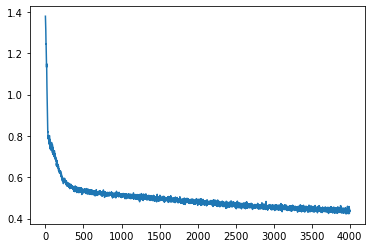

In [5]:
plt.plot(a)
plt.show